서울시 상권분석을 통한 상관관계 분석

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager,rc
mpl.rcParams['axes.unicode_minus']=False
font_path='C:/Users/user/AppData/Local/Microsoft/Windows/Fonts/JalnanOTF.otf'
font_name=font_manager.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)
import seaborn as sns

In [2]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [3]:
import folium

In [4]:
po=pd.read_excel("data/서울시 주민등록인구 (구별) 통계.xlsx")
po

,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,합계,4400403,9828094,4774856,5053238,9598484,4667524,4930960,229610,107332,122278,2.18,1567819
3,종로구,74113,156567,75772,80795,147296,71644,75652,9271,4128,5143,1.99,27781
4,중구,63746,133708,65312,68396,124552,60851,63701,9156,4461,4695,1.95,24767
5,용산구,112881,243336,118120,125216,229013,110181,118832,14323,7939,6384,2.03,39575
6,성동구,135883,298421,145358,153063,291906,142506,149400,6515,2852,3663,2.15,45968
7,광진구,166638,356191,171131,185060,343392,165747,177645,12799,5384,7415,2.06,50370
8,동대문구,165924,352570,173309,179261,338875,167895,170980,13695,5414,8281,2.04,60868
9,중랑구,185506,396807,195639,201168,392041,193752,198289,4766,1887,2879,2.11,69841


In [5]:
df=pd.DataFrame(data=po.iloc[2:,0:3])
df=df.reset_index()
df

,index,자치구,세대,인구
0,2,합계,4400403,9828094
1,3,종로구,74113,156567
2,4,중구,63746,133708
3,5,용산구,112881,243336
4,6,성동구,135883,298421
5,7,광진구,166638,356191
6,8,동대문구,165924,352570
7,9,중랑구,185506,396807
8,10,성북구,193965,444295
9,11,강북구,144410,307537


In [6]:
del df['index']
df

,자치구,세대,인구
0,합계,4400403,9828094
1,종로구,74113,156567
2,중구,63746,133708
3,용산구,112881,243336
4,성동구,135883,298421
5,광진구,166638,356191
6,동대문구,165924,352570
7,중랑구,185506,396807
8,성북구,193965,444295
9,강북구,144410,307537


In [7]:
bu=pd.read_excel('data/서울시 사업체현황.xlsx')
bu

,Unnamed: 0,사업체수,종사자수,농업 임업 및 어업,농업 임업 및 어업.1,광업,광업.1,제조업,제조업.1,전기 가스 증기 및 공기조절 공급업,...,공공행정 국방 및 사회보장 행정,공공행정 국방 및 사회보장 행정.1,교육 서비스업,교육 서비스업.1,보건업 및 사회복지 서비스업,보건업 및 사회복지 서비스업.1,예술 스포츠 및 여가관련 서비스업,예술 스포츠 및 여가관련 서비스업.1,협회 및 단체 수리 및 기타 개인 서비스업,협회 및 단체 수리 및 기타 개인 서비스업.1
0,합계,823624,5226997,24,426,20,43,57321,265273,225,...,1296,141582,35761,351320,29168,400143,23527,92752,69345,189557
1,종로구,39679,260446,3,18,5,10,4462,13180,16,...,94,15109,829,13474,750,17366,899,6034,2439,7649
2,중구,60127,392568,-,-,1,5,9018,28901,4,...,65,20287,502,8598,760,10342,558,3637,2112,8090
3,용산구,20254,135240,-,-,-,-,905,2955,3,...,47,3101,537,6973,562,7147,401,2623,1591,5494
4,성동구,28343,178243,2,5,-,-,4181,26041,18,...,45,4127,995,11678,754,9255,592,2113,2079,7787
5,광진구,24445,126305,-,-,-,-,1657,6935,3,...,36,2678,1209,14184,916,11551,1052,4209,2552,5828
6,동대문구,31324,138400,-,-,2,4,3146,12956,2,...,50,3430,1027,16657,1051,15154,762,2344,2532,5285
7,중랑구,28228,103345,-,-,-,-,3423,14695,6,...,47,3533,915,7925,1031,13013,968,2543,2753,5018
8,성북구,23617,111005,-,-,-,-,2144,7873,4,...,51,3308,1368,21947,1045,13249,745,2323,2625,5567
9,강북구,19014,73904,-,-,-,-,1456,5864,3,...,44,3108,683,5911,816,10099,751,2125,2275,4454


In [8]:
df['사업체수']=bu.iloc[:,1]
df['사업 종사자수']=bu.iloc[:,2]
df

,자치구,세대,인구,사업체수,사업 종사자수
0,합계,4400403,9828094,823624,5226997
1,종로구,74113,156567,39679,260446
2,중구,63746,133708,60127,392568
3,용산구,112881,243336,20254,135240
4,성동구,135883,298421,28343,178243
5,광진구,166638,356191,24445,126305
6,동대문구,165924,352570,31324,138400
7,중랑구,185506,396807,28228,103345
8,성북구,193965,444295,23617,111005
9,강북구,144410,307537,19014,73904


자치구별 지역내총생산 (단위:백만원)
지역내총생산(시장가격) = 지역내총부가가치(기초가격) + 순생산물세

In [9]:
go=pd.read_excel('data/자치구별 지역내총생산.xlsx')
go

,자치구,지역내총생산,구성비
0,서울시,423742112,100.0
1,종로구,31868698,7.5
2,중구,54274488,12.8
3,용산구,12300317,2.9
4,성동구,11657151,2.8
5,광진구,6342279,1.5
6,동대문구,7328160,1.7
7,중랑구,4452719,1.1
8,성북구,6054811,1.4
9,강북구,3207289,0.8


In [10]:
df['지역내총생산']=go.iloc[:,1]
df

,자치구,세대,인구,사업체수,사업 종사자수,지역내총생산
0,합계,4400403,9828094,823624,5226997,423742112
1,종로구,74113,156567,39679,260446,31868698
2,중구,63746,133708,60127,392568,54274488
3,용산구,112881,243336,20254,135240,12300317
4,성동구,135883,298421,28343,178243,11657151
5,광진구,166638,356191,24445,126305,6342279
6,동대문구,165924,352570,31324,138400,7328160
7,중랑구,185506,396807,28228,103345,4452719
8,성북구,193965,444295,23617,111005,6054811
9,강북구,144410,307537,19014,73904,3207289


In [11]:
dc=pd.read_excel('data/서울시 유통업체현황 (구별) 통계.xlsx')
dc

,자치구,합계,대형마트,백화점,전문점,쇼핑센터,복합쇼핑몰,그밖의 대규모점포
0,합계,467,59,29,22,38,10,309
1,종로구,13,-,-,2,-,-,11
2,중구,53,2,3,2,8,-,38
3,용산구,13,2,1,6,3,-,1
4,성동구,13,2,-,1,-,1,9
5,광진구,19,2,1,-,-,-,16
6,동대문구,21,2,1,3,-,-,15
7,중랑구,14,6,-,-,-,1,7
8,성북구,21,3,1,-,-,1,16
9,강북구,12,1,1,-,2,-,8


In [12]:
df['유통업체']=dc.iloc[:,1]
df

,자치구,세대,인구,사업체수,사업 종사자수,지역내총생산,유통업체
0,합계,4400403,9828094,823624,5226997,423742112,467
1,종로구,74113,156567,39679,260446,31868698,13
2,중구,63746,133708,60127,392568,54274488,53
3,용산구,112881,243336,20254,135240,12300317,13
4,성동구,135883,298421,28343,178243,11657151,13
5,광진구,166638,356191,24445,126305,6342279,19
6,동대문구,165924,352570,31324,138400,7328160,21
7,중랑구,185506,396807,28228,103345,4452719,14
8,성북구,193965,444295,23617,111005,6054811,21
9,강북구,144410,307537,19014,73904,3207289,12


In [13]:
sub=pd.read_excel('data/지하철역 수.xlsx')
sub

,Unnamed: 0,지하철역 수
0,합계,300
1,종로구,12
2,중구,14
3,용산구,13
4,성동구,15
5,광진구,9
6,동대문구,8
7,중랑구,11
8,성북구,12
9,강북구,11


In [14]:
df['지하철역수']=sub.iloc[:,1]
df

,자치구,세대,인구,사업체수,사업 종사자수,지역내총생산,유통업체,지하철역수
0,합계,4400403,9828094,823624,5226997,423742112,467,300
1,종로구,74113,156567,39679,260446,31868698,13,12
2,중구,63746,133708,60127,392568,54274488,53,14
3,용산구,112881,243336,20254,135240,12300317,13,13
4,성동구,135883,298421,28343,178243,11657151,13,15
5,광진구,166638,356191,24445,126305,6342279,19,9
6,동대문구,165924,352570,31324,138400,7328160,21,8
7,중랑구,185506,396807,28228,103345,4452719,14,11
8,성북구,193965,444295,23617,111005,6054811,21,12
9,강북구,144410,307537,19014,73904,3207289,12,11


In [15]:
df=df.iloc[1:,:]
df=df.set_index('자치구')
df

,세대,인구,사업체수,사업 종사자수,지역내총생산,유통업체,지하철역수
자치구,,,,,,,
종로구,74113,156567,39679,260446,31868698,13,12
중구,63746,133708,60127,392568,54274488,53,14
용산구,112881,243336,20254,135240,12300317,13,13
성동구,135883,298421,28343,178243,11657151,13,15
광진구,166638,356191,24445,126305,6342279,19,9
동대문구,165924,352570,31324,138400,7328160,21,8
중랑구,185506,396807,28228,103345,4452719,14,11
성북구,193965,444295,23617,111005,6054811,21,12
강북구,144410,307537,19014,73904,3207289,12,11


In [16]:
df.index

Index(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
       '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
       '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype='object', name='자치구')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   세대       25 non-null     object
 1   인구       25 non-null     object
 2   사업체수     25 non-null     int64 
 3   사업 종사자수  25 non-null     int64 
 4   지역내총생산   25 non-null     int64 
 5   유통업체     25 non-null     int64 
 6   지하철역수    25 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 1.6+ KB


In [18]:
df.describe()

,사업체수,사업 종사자수,지역내총생산,유통업체,지하철역수
count,25.000000,25.0000,2.500000e+01,25.000000,25.000000
mean,32944.960000,209079.8800,1.694968e+07,18.680000,12.000000
std,13218.163064,146782.4824,1.679955e+07,9.551265,5.291503
min,18628.000000,72939.0000,3.207289e+06,6.000000,3.000000
25%,24445.000000,113819.0000,6.342279e+06,13.000000,9.000000
50%,28343.000000,138400.0000,8.825479e+06,16.000000,12.000000
75%,39458.000000,257494.0000,1.947468e+07,21.000000,14.000000
max,71027.000000,698840.0000,6.918632e+07,53.000000,27.000000


In [19]:
df['세대']=pd.to_numeric(df['세대'])
df['인구']=pd.to_numeric(df['인구'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   세대       25 non-null     int64
 1   인구       25 non-null     int64
 2   사업체수     25 non-null     int64
 3   사업 종사자수  25 non-null     int64
 4   지역내총생산   25 non-null     int64
 5   유통업체     25 non-null     int64
 6   지하철역수    25 non-null     int64
dtypes: int64(7)
memory usage: 1.6+ KB


데이터 시각화 및 데이터 마이닝

<AxesSubplot:ylabel='자치구'>

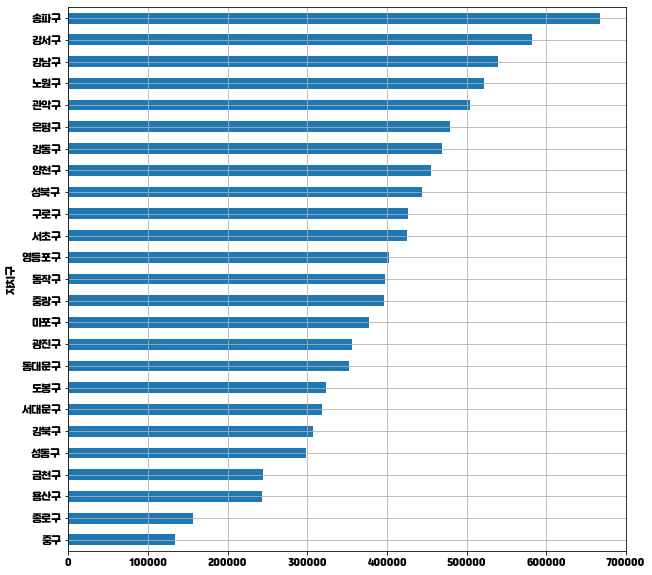

In [20]:
df['인구'].sort_values().plot(kind='barh',grid=True, figsize=(10,10))

In [21]:
state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
m1 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m1.choropleth(
    geo_data=state_geo,
    name='지역내총생산',
    data=df['지역내총생산'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'red',
    legend_name = '지역내총생산'
)
m1

c:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [22]:
state_geo

'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [23]:
m2 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m2.choropleth(
    geo_data=state_geo,
    name='지하철역수',
    data=df['지하철역수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '지하철역수'
)
m2

In [24]:
m3 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m3.choropleth(
    geo_data=state_geo,
    name='유통업체',
    data=df['유통업체'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '유통업체'
)
m3

In [26]:
m4 = folium.Map(location=[37.562225, 126.978555], tiles="openstreetmap", zoom_start=11)

m4.choropleth(
    geo_data=state_geo,
    name='사업체수',
    data=df['사업체수'],
    columns=['NAME', 'VALUE'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = '사업체수'
)
m4

c:\Users\user\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [28]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 생성
scaler = StandardScaler()

# 데이터프레임 표준화
df_std = scaler.fit_transform(df)

# 표준화된 데이터를 다시 데이터프레임으로 변환
df_std = pd.DataFrame(df_std, columns=df.columns)

df_std

,세대,인구,사업체수,사업 종사자수,지역내총생산,유통업체,지하철역수
0,-1.894718,-1.915784,0.519959,0.357163,0.906373,-0.606948,0.000000
1,-2.087476,-2.100910,2.098821,1.275846,2.267588,3.667336,0.385758
2,-1.173892,-1.213074,-0.979914,-0.513430,-0.282462,-0.606948,0.192879
3,-0.746208,-0.766962,-0.355333,-0.214418,-0.321536,-0.606948,0.578638
4,-0.174370,-0.299104,-0.656312,-0.575557,-0.644430,0.034194,-0.578638
5,-0.187646,-0.328430,-0.125160,-0.491457,-0.584535,0.247909,-0.771517
6,0.176448,0.029829,-0.364213,-0.735205,-0.759226,-0.500091,-0.192879
7,0.333729,0.414417,-0.720245,-0.681943,-0.661895,0.247909,0.000000
8,-0.587663,-0.693135,-1.075658,-0.939917,-0.834890,-0.713806,-0.192879
9,-0.704615,-0.561816,-1.105463,-0.946627,-0.826053,-1.034377,-1.157275


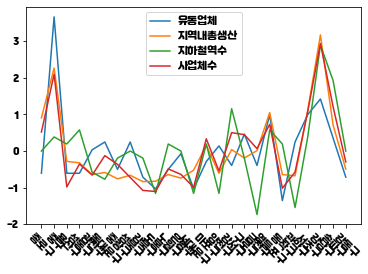

In [29]:
plt.xticks(rotation = -45)
plt.tick_params(axis='x')
plt.plot(df.index , df_std['유통업체'], label = '유통업체') 
plt.plot(df.index, df_std['지역내총생산'], label = '지역내총생산') 
plt.plot(df.index, df_std['지하철역수'], label = '지하철역수') 
plt.plot(df.index, df_std['사업체수'], label = '사업체수') 
plt.legend()
plt.show()

Text(0, 0.5, '유통업체')

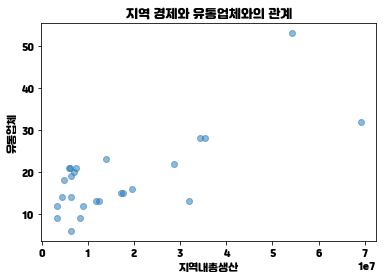

In [30]:
x = df['지역내총생산']
y = df['유통업체']
plt.title('지역 경제와 유통업체와의 관계')
plt.scatter(x,y, alpha=0.5)
plt.xlabel('지역내총생산')
plt.ylabel('유통업체')

Text(0, 0.5, '인구')

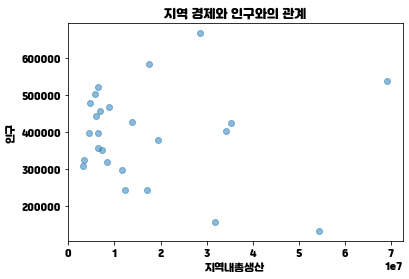

In [31]:
x = df['지역내총생산']
y = df['인구']
plt.title('지역 경제와 인구와의 관계')
plt.scatter(x,y, alpha=0.5)
plt.xlabel('지역내총생산')
plt.ylabel('인구')

Text(0, 0.5, '지하철역수')

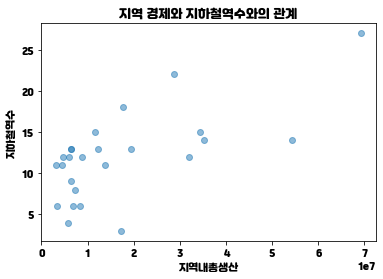

In [32]:
x = df['지역내총생산']
y = df['지하철역수']
plt.title('지역 경제와 지하철역수와의 관계')
plt.scatter(x,y, alpha=0.5)
plt.xlabel('지역내총생산')
plt.ylabel('지하철역수')

Text(0, 0.5, '사업체')

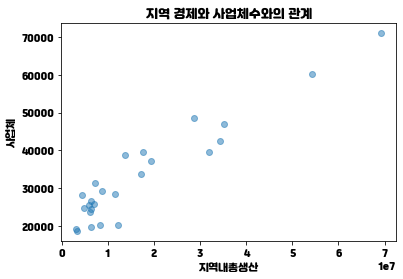

In [33]:
x = df['지역내총생산']
y = df['사업체수']
plt.title('지역 경제와 사업체수와의 관계')
plt.scatter(x,y, alpha=0.5)
plt.xlabel('지역내총생산')
plt.ylabel('사업체')

In [34]:
corr = df.corr()
corr

,세대,인구,사업체수,사업 종사자수,지역내총생산,유통업체,지하철역수
세대,1.000000,0.969264,0.082512,0.083645,-0.092852,-0.079631,0.339307
인구,0.969264,1.000000,0.130375,0.136206,-0.048713,-0.063033,0.411729
사업체수,0.082512,0.130375,1.000000,0.950647,0.946151,0.761728,0.677998
사업 종사자수,0.083645,0.136206,0.950647,1.000000,0.959921,0.655544,0.701200
지역내총생산,-0.092852,-0.048713,0.946151,0.959921,1.000000,0.731637,0.660073
유통업체,-0.079631,-0.063033,0.761728,0.655544,0.731637,1.000000,0.332242
지하철역수,0.339307,0.411729,0.677998,0.701200,0.660073,0.332242,1.000000


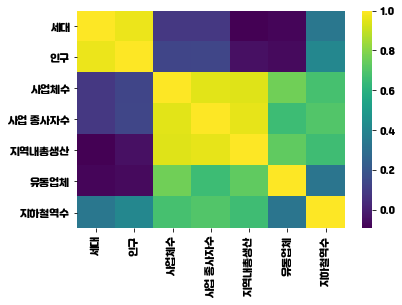

In [35]:
sns.heatmap(corr, cmap='viridis')
plt.show()